In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [72]:
#training data
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#testing data
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df_train.shape

(891, 12)

In [115]:
df_test.shape

(418, 11)

In [75]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Analyze the features by pivoting techniques

In [78]:
#Sex vs Survived
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [79]:
#Pclass(Ticket class) vs Survived
df_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [80]:
#SibSp(siblings / spouses) vs Survived
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [81]:
#Parch(parents / children) vs Survived
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<center>-----------------------------------------------------------------------------------------------------</center>

### Visualization

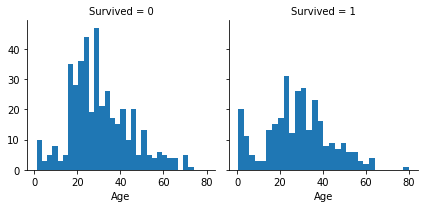

In [82]:
d = sns.FacetGrid(data=df_train, col='Survived')
d.map(plt.hist, 'Age', bins=30)

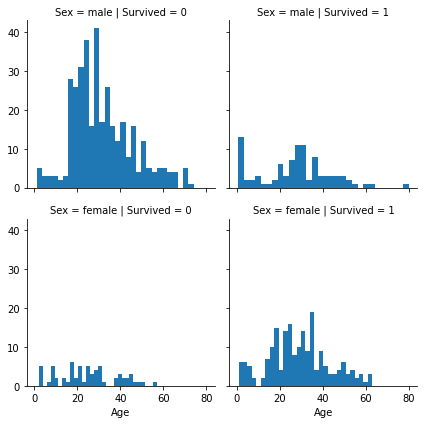

In [83]:
d2 = sns.FacetGrid(data=df_train, row='Sex', col='Survived')
d2.map(plt.hist, 'Age', bins=30)

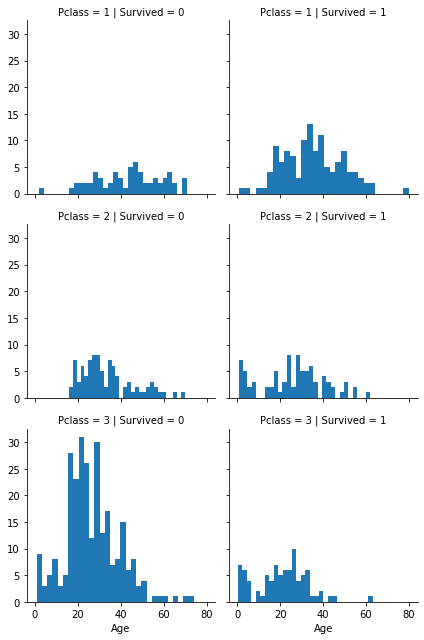

In [84]:
d3 = sns.FacetGrid(data=df_train, row='Pclass', col='Survived')
d3.map(plt.hist, 'Age', bins=30)

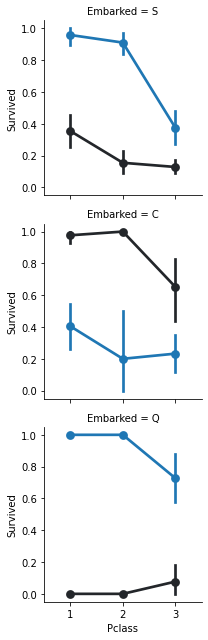

In [85]:
d4 = sns.FacetGrid(data=df_train, row='Embarked')
d4.map(sns.pointplot, 'Pclass','Survived','Sex', bins=30)

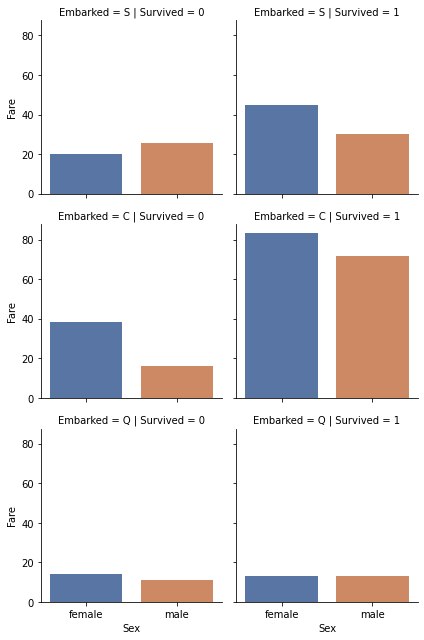

In [86]:
d5 = sns.FacetGrid(data=df_train, row='Embarked', col='Survived')
d5.map(sns.barplot, 'Sex','Fare', palette='deep', ci=None)

**Interpretation:**
1. Oldest passengers survived (Age=80).
2. Most passengers are in 17-37 age range approximately.
3. Pclass=2 and Pclass=3 passengers are mostly survived.
4. Pclass=3 had most passengers but most of the passengers did not survive.
5. Most passengers in Pclass=1 survived. 
6. Higher fare paying passengers had better survival.

<center>-----------------------------------------------------------------------------------------------------</center>

### Data Preprocessing

In [87]:
df_train.shape

(891, 12)

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
dataset =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

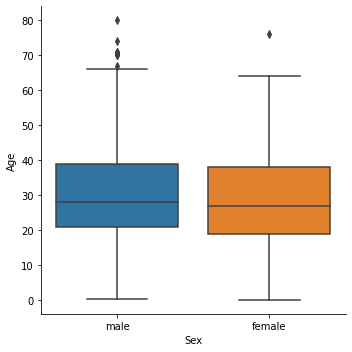

In [91]:
sns.factorplot(y="Age", x="Sex", data=dataset, kind="box")

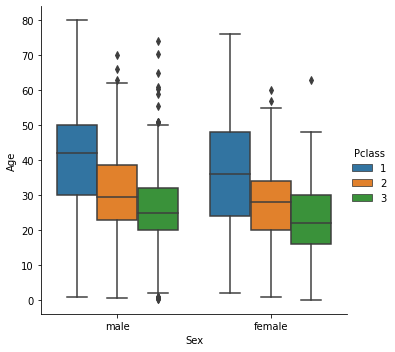

In [92]:
sns.factorplot(y="Age", x="Sex", hue="Pclass", data=dataset, kind="box")

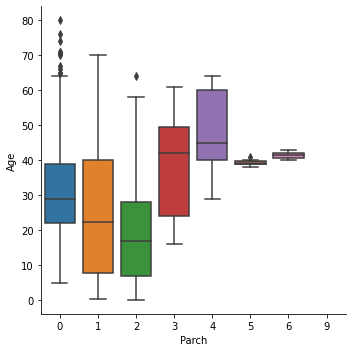

In [93]:
sns.factorplot(y="Age", x="Parch", data=dataset, kind="box")

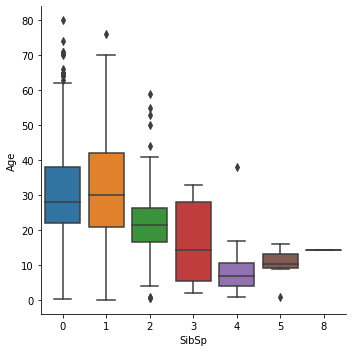

In [94]:
sns.factorplot(y="Age", x="SibSp", data=dataset, kind="box")

In [95]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [96]:
# Fill empty and NaNs values with NaN
dataset.fillna(np.nan)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

<AxesSubplot:>

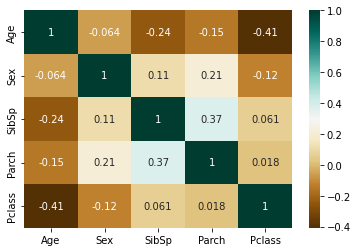

In [99]:
sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

**Interpretation:**
1. Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.

##### The strategy is to fill Age with the median age of similar rows according to Pclass, Parch and SibSp.

In [100]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & 
                               (dataset['Parch'] == dataset.iloc[i]["Parch"]) & 
                               (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

In [101]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [102]:
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [103]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [105]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [106]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [107]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [109]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [110]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [111]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"], prefix="Pc")

In [112]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [113]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S,Cabin_A,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [114]:
dataset.isnull().sum()

Survived     418
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Em_C           0
Em_Q           0
Em_S           0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_X        0
T_A            0
T_A4           0
T_A5           0
T_AQ3          0
T_AQ4          0
T_AS           0
T_C            0
T_CA           0
T_CASOTON      0
T_FC           0
T_FCC          0
T_Fa           0
T_LINE         0
T_LP           0
T_PC           0
T_PP           0
T_PPP          0
T_SC           0
T_SCA3         0
T_SCA4         0
T_SCAH         0
T_SCOW         0
T_SCPARIS      0
T_SCParis      0
T_SOC          0
T_SOP          0
T_SOPP         0
T_SOTONO2      0
T_SOTONOQ      0
T_SP           0
T_STONO        0
T_STONO2       0
T_STONOQ       0
T_SWPP         0
T_WC           0
T_WEP          0
T_X            0
Pc_1           0
Pc_2           0
Pc_3           0
dtype: int64

<center>-----------------------------------------------------------------------------------------------------</center>

In [116]:
#separate train-test data
train_len = len(df_train)

train = dataset[:train_len]
test  = dataset[train_len:]

In [117]:
train["Survived"] = train["Survived"].astype(int)
y_train = train["Survived"]
x_train = train.drop(labels = ["Survived"], axis=1)

In [120]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
k_fold = StratifiedKFold()

random_state = 40
classifiers  = []

classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))

classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), 
                                      random_state=random_state, 
                                      learning_rate=0.001))

classifiers.append(GradientBoostingClassifier(random_state=random_state))

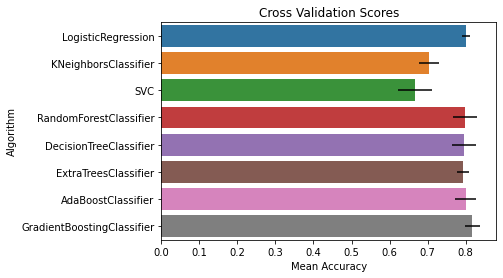

In [134]:
cv_results = []

for c in classifiers :
    cv_results.append(cross_val_score(c, x_train, y = y_train, scoring = "accuracy", cv = k_fold, n_jobs=4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,
                       "Algorithm":["LogisticRegression", 
                                    "KNeighborsClassifier", 
                                    "SVC", 
                                    "RandomForestClassifier",
                                    "DecisionTreeClassifier",
                                    "ExtraTreesClassifier",
                                    "AdaBoostClassifier",
                                    "GradientBoostingClassifier"]})

plot = sns.barplot("CrossValMeans", "Algorithm", data = cv_res, orient = "h",**{'xerr':cv_std})
plot.set_xlabel("Mean Accuracy")
plot = plot.set_title("Cross Validation Scores")